In [ ]:
# Install Kaggle and authenticate
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Select the 'kaggle.json' file downloaded from Kaggle

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aioshichowdhury","key":"c403ded3833a021f35813c9d0325a1f7"}'}

In [ ]:
# Set up Kaggle API credentials
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Download the dataset
!kaggle datasets download -d suryaprabhakaran2005/road-accidents-from-cctv-footages-dataset

Dataset URL: https://www.kaggle.com/datasets/suryaprabhakaran2005/road-accidents-from-cctv-footages-dataset
License(s): MIT
 99% 661M/670M [00:05<00:00, 126MB/s]
100% 670M/670M [00:05<00:00, 127MB/s]


In [ ]:
# Unzip the dataset
!unzip road-accidents-from-cctv-footages-dataset.zip -d /content/AccidentDataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/387.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/388.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/389.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/39.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/390.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/391.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/392.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/393.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/394.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severit

In [ ]:
import os
import random

# Directory containing the Non-Accident images
non_accident_dir = '/content/AccidentDataset/NonAccident/NonAccident'

# Get a list of all .jpg files in the directory
jpg_files = [file for file in os.listdir(non_accident_dir) if file.endswith('.jpg')]

# Calculate the number of files to delete to reduce the count by half
num_files_to_delete = len(jpg_files) // 2

# Randomly select files to delete
files_to_delete = random.sample(jpg_files, num_files_to_delete)

# Delete the selected files
for file in files_to_delete:
    file_path = os.path.join(non_accident_dir, file)
    os.remove(file_path)
    print(f"Deleted: {file_path}")

print(f"Reduced Non-Accident images by half. Deleted {num_files_to_delete} files.")

Streaming output truncated to the last 5000 lines.
Deleted: /content/AccidentDataset/NonAccident/NonAccident/10863.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/12970.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/10759.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/11122.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/11558.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/13747.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/1011.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/7755.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/11586.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/2497.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/14756.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/2308.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/2882.jpg
Deleted: /content/AccidentDataset/NonAccident/NonAccident/15358.jpg
De

In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Constants
IMG_SIZE = 128
ColorChannels = 3
CLASSES = ["NonAccident", "Accident"]

In [ ]:
# Directory setup
video_data_dir = '/content/AccidentDataset'
accident_dir = os.path.join(video_data_dir, 'Accident', 'Accident')
non_accident_dir = os.path.join(video_data_dir, 'NonAccident', 'NonAccident')

In [ ]:
# Function to load video frames
def video_to_frames(video):
    vidcap = cv2.VideoCapture(video)
    frames = []
    while vidcap.isOpened():
        success, image = vidcap.read()
        if not success:
            break
        resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        frames.append(resized)
    vidcap.release()
    return frames

In [ ]:
# Function to load videos for each category
def load_category_videos(category_dir, class_num):
    X_data = []
    y_data = []
    for video in tqdm(os.listdir(category_dir)):
        video_path = os.path.join(category_dir, video)
        frames = video_to_frames(video_path)
        for frame in frames:
            X_data.append(frame)
            y_data.append(class_num)
    return X_data, y_data

In [ ]:
# Load Accident and Non-Accident data
X_accident, y_accident = load_category_videos(accident_dir, CLASSES.index("Accident"))
X_non_accident, y_non_accident = load_category_videos(non_accident_dir, CLASSES.index("NonAccident"))

100%|██████████| 7710/7710 [00:09<00:00, 826.81it/s]


In [ ]:
# Combine accident and non-accident data
X_data = np.array(X_accident + X_non_accident).reshape(-1, IMG_SIZE, IMG_SIZE, ColorChannels)
y_data = np.array(y_accident + y_non_accident)

In [ ]:
# Split the data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [ ]:
# Normalize the data (pixel values scaled between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Define the GoogleNet (InceptionV3) model for accident detection
def create_accident_detection_model():
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, ColorChannels))
    base_model = InceptionV3(weights="imagenet", include_top=False, input_tensor=input_tensor, pooling='avg')

    head = base_model.output
    head = Dense(128, activation="relu")(head)
    head = Dropout(0.5)(head)
    head = Dense(1, activation="sigmoid")(head)

    model = Model(inputs=base_model.input, outputs=head)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
# Create and summarize the model
model = create_accident_detection_model()
model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
# Set up callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("accident_detection_model.keras", monitor="val_loss", save_best_only=True)
]

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/20
348/348 [==============================] - 477s 1s/step - loss: 0.5005 - accuracy: 0.7638 - val_loss: 0.3087 - val_accuracy: 0.8954
Epoch 2/20
348/348 [==============================] - 459s 1s/step - loss: 0.3060 - accuracy: 0.8700 - val_loss: 0.1839 - val_accuracy: 0.9396
Epoch 3/20
348/348 [==============================] - 465s 1s/step - loss: 0.2209 - accuracy: 0.9087 - val_loss: 0.1331 - val_accuracy: 0.9547
Epoch 4/20
348/348 [==============================] - 463s 1s/step - loss: 0.1860 - accuracy: 0.9204 - val_loss: 0.1160 - val_accuracy: 0.9637
Epoch 5/20
348/348 [==============================] - 464s 1s/step - loss: 0.1589 - accuracy: 0.9331 - val_loss: 0.0926 - val_accuracy: 0.9676
Epoch 6/20
348/348 [==============================] - 462s 1s/step - loss: 0.1405 - accuracy: 0.9422 - val_loss: 0.0807 - val_accuracy: 0.9784
Epoch 7/20
348/348 [==============================] - 464s 1s/step - loss: 0.1240 - accuracy: 0.9484 - val_loss: 0.0774 - val_accuracy: 0.9723

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

87/87 [==============================] - 93s 1s/step - loss: 0.0405 - accuracy: 0.9914
Test Loss: 0.04049334675073624
Test Accuracy: 0.9913700222969055


In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

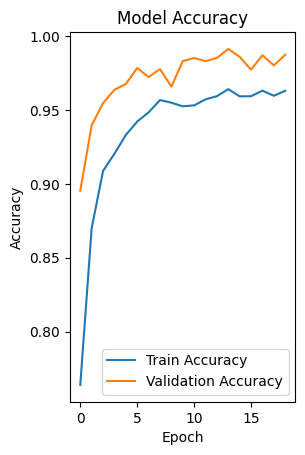

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

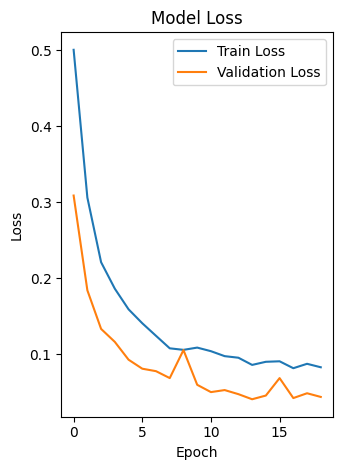

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Predict on the test set for confusion matrix
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions (0 or 1)

87/87 [==============================] - 94s 1s/step


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

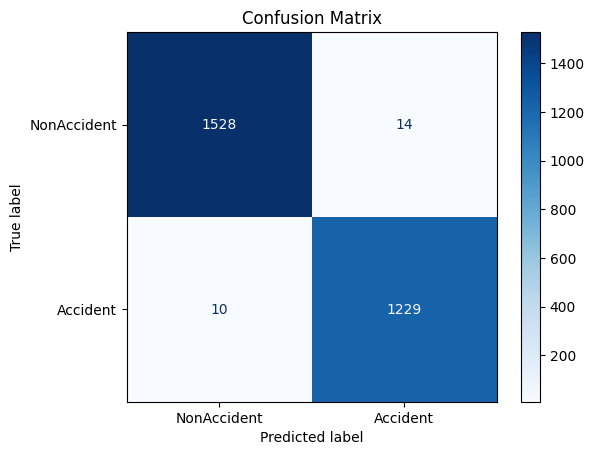

In [ ]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Convert one-hot encoded y_test to binary labels if necessary
if len(y_test.shape) > 1 and y_test.shape[1] == 10:  # Assuming 10 is the number of one-hot columns
    y_test = np.argmax(y_test, axis=1)  # Convert to binary labels (0 or 1)


from sklearn.metrics import f1_score
import numpy as np

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict on the test set
y_pred = model.predict(X_test, verbose=0)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary labels
y_test_labels = y_test.flatten()  # Ensure y_test is a flattened binary array

# Calculate F1-score
f1 = f1_score(y_test_labels, y_pred_labels)

# Display results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")

Test Loss: 0.0405
Test Accuracy: 99.14%
F1 Score: 0.9903


In [ ]:
#save the model

from tensorflow.keras.models import load_model


model.save(os.path.join('models','image_binary_classifier.h5'))

import os
from tensorflow.keras.models import load_model

# Assuming the model was saved as 'imageclassifier.h5' in the 'models' directory
new_model = load_model(os.path.join('models','image_binary_classifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
